# TP0: Introducción a Python para DSP

Este trabajo práctico tiene como objetivo familiarizarte con la generación y análisis básico de señales usando **Python puro**, **NumPy** y **SciPy**.

## Objetivos
1. Definir funciones para generar señales básicas en Python puro (sin bibliotecas externas).
2. Generar señales usando bibliotecas como **NumPy** y **SciPy**.
3. Comprender la diferencia entre listas y arrays, y el beneficio del vectorizado.
4. Practicar operaciones básicas: encontrar máximos y mínimos en señales.


## Ejercicio 1: Señal cuadrada en Python puro

**Tarea:** Crea una función que genere una señal cuadrada de longitud `N` con los primeros `k` valores en `0` y los siguientes `k` en `1`.

**Indicaciones:**
- Usa bucles `for`.
- Devuelve la señal como una lista.
- Muestra la lista y grafícala usando `matplotlib`.


[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


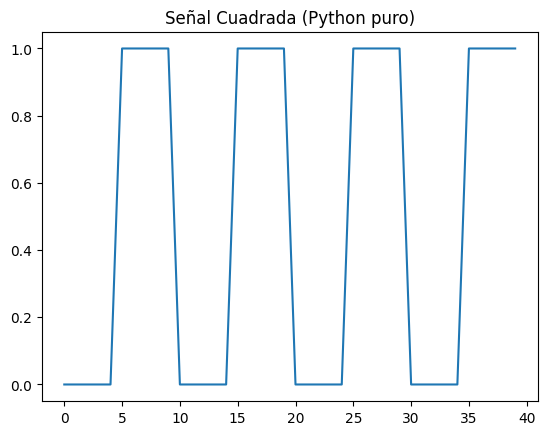

In [1]:
import matplotlib.pyplot as plt

def generar_senal_cuadrada(N, k):
    senial = []
    for i in range(N):
        # Determina si estamos en un bloque de 0 o de 1
        if (i // k) % 2 == 0:
            senial.append(0)
        else:
            senial.append(1)
    return senial


    
N = 40  # longitud total de la señal
k = 5   # longitud de cada bloque

senal_cuad = generar_senal_cuadrada(N,k)
print(senal_cuad)
plt.title('Señal Cuadrada (Python puro)')
plt.plot(senal_cuad)
plt.show()

## Ejercicio 2: Señal triangular en Python puro

**Tarea:** Crea una función que genere una señal triangular que suba desde `0` hasta `M` y luego baje a `0`.

**Indicaciones:**
- Usa bucles `for`.
- Devuelve la lista y grafícala.


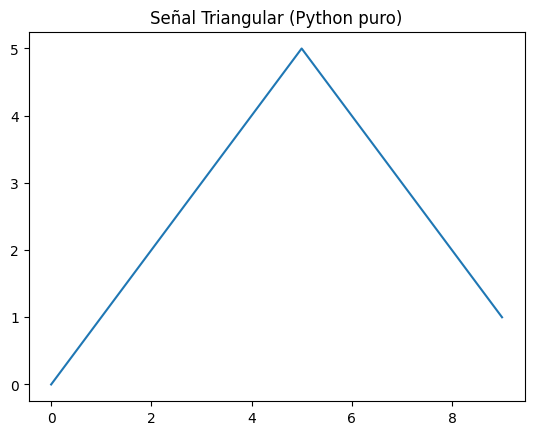

In [2]:
def generar_senal_triangular(M):
    senial = []
    for i in range(M):
        senial.append(i)
    for i in range(M, 0, -1):
        senial.append(i)
    return senial

senal_tria = generar_senal_triangular(5)
plt.title('Señal Triangular (Python puro)')
plt.plot(senal_tria)
plt.show()

## Ejercicio 3: Delta de Dirac en Python puro

**Tarea:** Implementa la función `generar_delta_dirac(longitud, posicion)` que devuelve una lista de ceros con un único `1` en la posición indicada.

**Prueba la función** para `longitud = 10` y `posición = 5`.


In [3]:
def generar_delta_dirac(cantidad, pos):
    if pos >= cantidad:
        return 'Error: posición fuera de rango'
    delta = [0]*cantidad
    delta[pos] = 1
    return delta

print(generar_delta_dirac(10,5))

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


## Ejercicio 4: Generación con NumPy/SciPy

Repite los ejercicios anteriores usando **NumPy/SciPy** y grafíca las señales junto con su **base de tiempo** (`t`) generada con `np.linspace()` o `np.arange()`.

**Pregunta:** ¿Cuál es la diferencia entre usar `linspace` y `arange`?

**Pistas:**
- Señal cuadrada: `sig.square()`.
- Señal senoidal: `np.sin()`.
- Señal triangular: `sig.sawtooth()`
- Señal delta de dirac: `np.dirac()` (o `np.concatenate()` con `zeros` y `ones`).


## Ejercicio 4: Respuestas

**Pregunta:** ¿Cuál es la diferencia entre usar `linspace` y `arange`?

Linspace:
- Genera valores equitativamente espaciados entre start y stop.
- Ideal para trabajar con valores decimales precisos.

Arange:
- Genera valores desde start hasta justo antes de stop, avanzando por step.
- Más parecido a range().
- Puede tener problemas de precisión con pasos decimales pequeños.


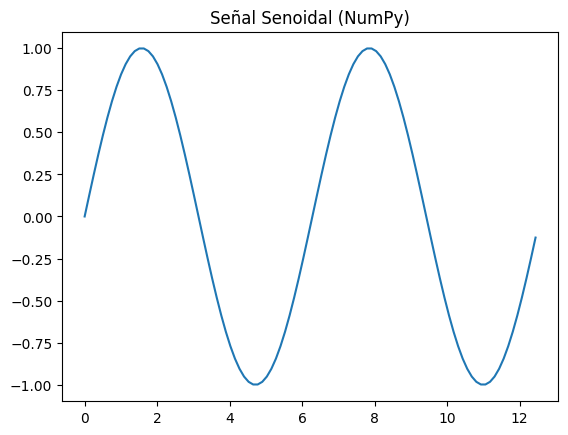

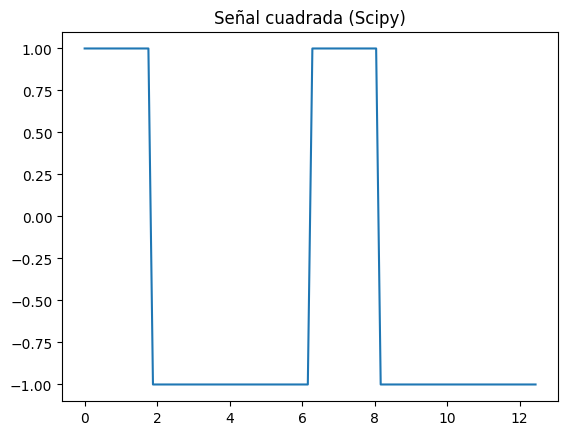

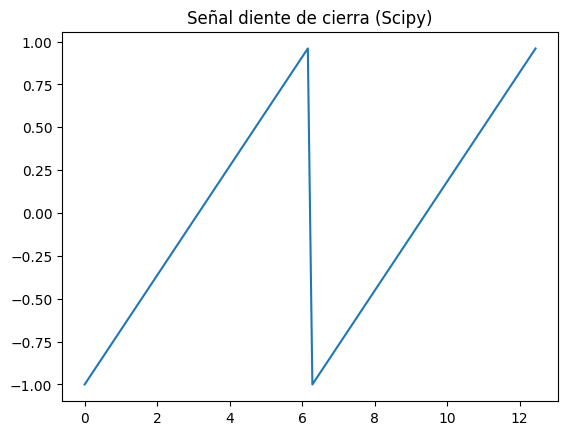

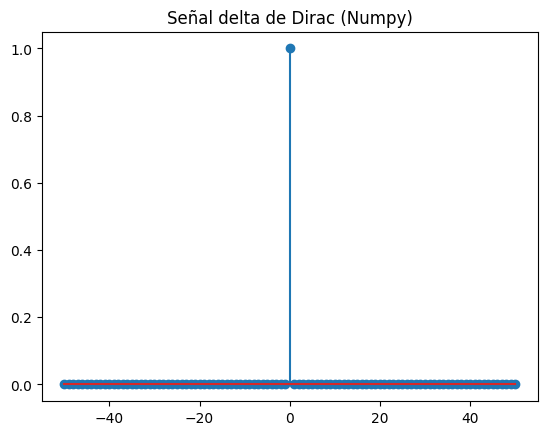

In [4]:
import numpy as np
from scipy import signal

# Señal senoidal con NumPy
frec = 2
f_muestreo = 100


T = np.arange(0, 1, 1/f_muestreo)
t=2 * np.pi * frec * T
# Señal sinusoidal: 
senal_seno = np.sin(t)
plt.title('Señal Senoidal (NumPy)')
plt.plot(t, senal_seno)
plt.show()

# Señal cuadrada: 
duty=0.3
senal_cuadrada=signal.square(t,duty)
plt.title('Señal cuadrada (Scipy)')
plt.plot(t, senal_cuadrada)
plt.show()

# Señal triangular:
senal_triangular = signal.sawtooth(t, width=1.0) #Proporción del ciclo en la que la señal sube (entre 0 y 1).
plt.title('Señal diente de cierra (Scipy)')
plt.plot(t, senal_triangular)
plt.show()

# Señal delta de Dirac:
n = 100  # longitud total
senal_DDIRAC=np.concatenate((np.zeros(n//2), [1], np.zeros(n//2))) # concateno todo ceros y el pulso que simula el delta de dirac
# Crear eje de tiempo simulado
m = np.arange(-n//2, n//2 + 1) # creo un eje centrado en cero para una mejro visualizacion de la onda

# Graficar
plt.stem(m, senal_DDIRAC) # esta funcion se utiliza para crear graficos discretos
plt.title('Señal delta de Dirac (Numpy)')
plt.show()


## Ejemplo: Señal cuadrada con `scipy.signal`


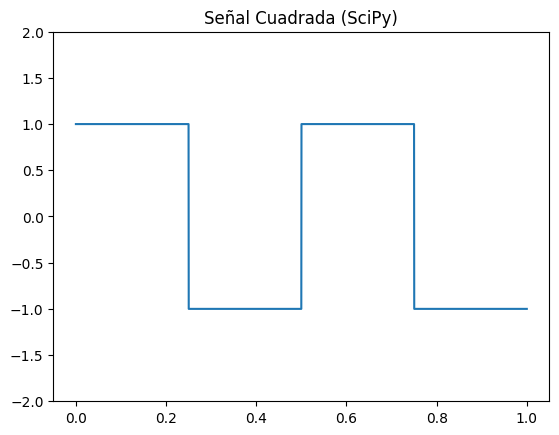

In [5]:
import scipy.signal as sig

frec_muestreo = 5000
frec_senial = 2
t = np.arange(0,1,1/frec_muestreo)
senal_cuadrada_scipy = sig.square(2 * np.pi * frec_senial * t)

plt.title('Señal Cuadrada (SciPy)')
plt.plot(t, senal_cuadrada_scipy)
plt.ylim(-2, 2)
plt.show()

## Ejercicio 6: Máximos y mínimos

Encuentra el valor máximo y mínimo de una señal y sus posiciones:

- Primero con Python puro (listas y bucles).
- Luego con NumPy (`np.max`, `np.min`, `np.argmax`, `np.argmin`).


In [11]:
# Sin NumPy
# Inicializar valores
# Encontrar valor máximo y mínimo
max_val = senal_seno[0]
min_val = senal_seno[0]

for val in senal_seno:
    if val > max_val:
        max_val = val
    if val < min_val:
        min_val = val

# Guardar todas las posiciones donde ocurren
max_posiciones = []
min_posiciones = []

for i in range(len(senal_seno)):
    if senal_seno[i] == max_val:
        max_posiciones.append(i)
    if senal_seno[i] == min_val:
        min_posiciones.append(i)

# Mostrar resultados
print("Valor máximo:", max_val)
print("Posiciones del máximo:", max_posiciones)
print("Valor mínimo:", min_val)
print("Posiciones del mínimo:", min_posiciones)

Valor máximo: 0.9980267284282716
Posiciones del máximo: [12, 13, 62, 63]
Valor mínimo: -0.9980267284282716
Posiciones del mínimo: [37, 38, 87, 88]


In [13]:
# Con NumPy

# Valores extremos
max_val = np.max(senal_seno)
min_val = np.min(senal_seno)

# Posiciones donde ocurren
max_posiciones = np.where(senal_seno == max_val)[0] # utilizo where para encontrar en donde la señal es maxima
min_posiciones = np.where(senal_seno == min_val)[0] # utilizo where para encontrar en donde la señal es minima

# Mostrar resultados
print("Valor máximo:", max_val)
print("Posiciones del máximo:", max_posiciones)
print("Valor mínimo:", min_val)
print("Posiciones del mínimo:", min_posiciones)




Valor máximo: 0.9980267284282716
Posiciones del máximo: [12 13 62 63]
Valor mínimo: -0.9980267284282716
Posiciones del mínimo: [37 38 87 88]
